In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 5

In [5]:
# loading the dataset using tf from the directory

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

# we r using shuffling,so each batch contain diff-diff image that belongs to diff-diff label

Found 8472 files belonging to 13 classes.


In [6]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 570 files belonging to 13 classes.


In [7]:
print(len(dataset2))

18


In [8]:
print(len(dataset))

265


In [9]:
class_names = dataset.class_names
class_names

['Field Cricket',
 'Jute Stem Weevil',
 'Spilosoma Obliqua',
 'Yellow Mite',
 'aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [10]:
print(len(dataset))             # batch size
#print(int(880/32)+1)

265


In [11]:
dataset.take(1)      #1st batch

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
for image_batch,label_batch in dataset.take(1):       # taking 1st batch
    print(image_batch.shape)   #image shape of that batch
    kp = image_batch.shape
    print(label_batch)  # kis label ka hai image 
    #print(label_batch.name)

(32, 256, 256, 3)
tf.Tensor(
[ 8  5 11  0  1  4  8  9  5 12  7  7  3  4  0  9  4  8  2  2  3 12  6 12
  4  4 11 11  5 12 11 11], shape=(32,), dtype=int32)


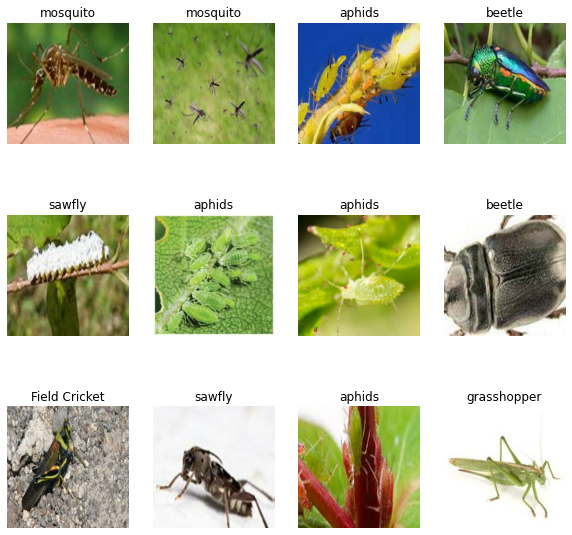

In [13]:
plt.figure(figsize=(10,10))
for image_bathc,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_bathc[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [14]:
len(dataset)
#28*32

265

In [15]:
# Steps---
# 1 - split into train and validation
# 2 - resize and rescale
# 3 - Data Augmentation
# 4 - Fit the model
# 5 - Check accuracy with test dataset

# Split into train and validation

In [16]:
train_size = 0.9
len(dataset)*train_size

238.5

In [17]:
train_ds=dataset.take(25)  # it will take first 25 batch of a batch of dataset and store in train_ds(NOW THis is our train ds)
len(train_ds)

25

In [18]:
"""def get_dataset_partition_tf(ds,train_split=0.9, val_split=0.1, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds,val_ds"""

'def get_dataset_partition_tf(ds,train_split=0.9, val_split=0.1, shuffle = True, shuffle_size=10000):\n    \n    ds_size = len(ds)\n    if shuffle:\n        ds = ds.shuffle(shuffle_size, seed=12)\n    \n    train_size = int(train_split*ds_size)\n    \n    train_ds = ds.take(train_size)\n    val_ds = ds.skip(train_size)\n    \n    return train_ds,val_ds'

In [19]:
#train_ds,val_ds = get_dataset_partition_tf(dataset)

In [20]:
len(dataset)

265

In [21]:
len(train_ds)           # total number of batch for training size 

25

In [22]:
def get_dataset_partitionn_tf(ds,val_split=0.5,test_split=0.5, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    val_size = int(val_split*ds_size)
    
    val_ds = ds.take(val_size)
    test_ds = ds.skip(val_size)
    
    return val_ds,test_ds



In [23]:
val_ds,test_ds = get_dataset_partitionn_tf(dataset2,val_split = 0.5,test_split=0.5)

In [24]:
len(val_ds)

9

In [25]:
len(test_ds)

9

# Till here train,test,val split wala part done
## Total batches for training  - 28 (aug) 
### Traing Batch       - 2    
### Validation Batch   -2 

In [26]:
# Augmentation 

import Augmentor


""""import Augmentor

path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/"
p = Augmentor.Pipeline(path_to_data)
p.rotate(probability=0.85, max_left_rotation=10, max_right_rotation=10)    #rotation
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)                  #zoom
p.sample(2)  #how many images u want to augment

# probability parameter controls how often the operation is applied""""

In [27]:
total_class_in_dataset = list(dataset.class_names)
print(total_class_in_dataset)

['Field Cricket', 'Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite', 'aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


import os
def aug_img():
    
    count = 0
    dir_path = path_of_foldd
    for path in os.scandir(dir_path):
        if path.is_file():
            count += 1
    #print('file count:', count) 
    augmented_img = 300-count
    #print(lt,"ltt")
    return augmented_img
    
#aug_img()

In [28]:
import os
import cv2

# this function fix the number of augmented images and handle RGBA images
def aug_imgg():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))     #file name of particular dir
    
    for mm in range(len(dir_list)):

        if dir_list[mm]=='output':
            pass
        else:
            im = cv2.imread(dir_path+dir_list[mm])
            
            h,w,c = im.shape
            if c==4:
                os.remove(dir_path+dir_list[mm])
            else:
                count=count+1
   
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    return augmented_img

# pip install Pillow

In [29]:
# this function fix the number of augmented images and handle RGBA images, MAIN-------------------------------------------------
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    #print(dir_path)
    #print((dir_list))
    #print(dir_list)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        #print(mm)
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            #print(file_path,"\n")
            
            #print("kjhkn")
            
            im1 = Image.open(file_path,'r')
                
            if im1.mode == 'RGB':
                #print(im1.mode)
                #im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                     # issue aata hai koi file mei toh use remove kr denge except use krke
                #print(im.shape,"sfs")
                #print(im,"dsf")
                count=count+1
                #print(dir_list[mm],'\n')
            else:
                os.remove(file_path)
            
    
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
#aug_img()

In [30]:
"""# this function fix the number of augmented images and handle RGBA images
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    print(dir_path)
    #print((dir_list))
    #print(dir_list)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        #print(mm)
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            #print(file_path,"\n")
            
            try:
                print("kjhkn")
                im1 = Image.open(file_path)
                
                if im1.mode == 'RGB':
                    print(im1.mode)
                    #im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                     # issue aata hai koi file mei toh use remove kr denge except use krke
                    #print(im.shape,"sfs")
                    #print(im,"dsf")
                    count=count+1
                    #print(dir_list[mm],'\n')
                else:
                    pass
                
            except:
                #print(dir_list[mm],'\n')
                #os.remove(file_path)
                print('sfd')
            
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
aug_img()"""

'# this function fix the number of augmented images and handle RGBA images\nimport os\nimport cv2\nfrom PIL import Image\ndef aug_img():\n    \n    count = 0\n    dir_path = path_of_foldd              # that dir path\n    dir_list = (os.listdir(dir_path))            #file name of particular dir\n    \n    print(dir_path)\n    #print((dir_list))\n    #print(dir_list)\n    for mm in range(len(dir_list)):\n        #print(dir_list[mm])\n        #print(mm)\n        #print((dir_list))\n        if dir_list[mm]==\'output\':\n            pass\n        else:\n            #print(dir_path+dir_list[mm])\n            file_path = (dir_path+dir_list[mm])\n            #print(file_path,"\n")\n            \n            try:\n                print("kjhkn")\n                im1 = Image.open(file_path)\n                \n                if im1.mode == \'RGB\':\n                    print(im1.mode)\n                    #im1.save(dir_path+\'/\'+\'outputt/\'+dir_list[mm])  # yha apn dusri dir mei file save krwa

In [31]:
"""# this function fix the number of augmented images and handle RGBA images
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    #print(dir_path)
    #print((dir_list))
    #print(dir_list)
    #path = "C:/Users/Asus/Desktop/trash"+""/outputt"
    #os.mkdir(path)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            try:
                im1 = Image.open(file_path)
                im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                 # issue aata hai koi file mei toh use remove kr denge except use krke
                #print(im.shape,"sfs")
                #print(im,"dsf")
                count=count+1
                #print(dir_list[mm],'\n')
                
            except:
                print(dir_list[mm],'\n')
                #os.remove(file_path)
            
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
aug_img()"""

'# this function fix the number of augmented images and handle RGBA images\nimport os\nimport cv2\nfrom PIL import Image\ndef aug_img():\n    \n    count = 0\n    dir_path = path_of_foldd              # that dir path\n    dir_list = (os.listdir(dir_path))            #file name of particular dir\n    \n    #print(dir_path)\n    #print((dir_list))\n    #print(dir_list)\n    #path = "C:/Users/Asus/Desktop/trash"+""/outputt"\n    #os.mkdir(path)\n    for mm in range(len(dir_list)):\n        #print(dir_list[mm])\n        \n        #print((dir_list))\n        if dir_list[mm]==\'output\':\n            pass\n        else:\n            #print(dir_path+dir_list[mm])\n            file_path = (dir_path+dir_list[mm])\n            try:\n                im1 = Image.open(file_path)\n                im1.save(dir_path+\'/\'+\'outputt/\'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi\n                                                                 # issue aata hai koi file 

# RGBA Image checker

import os
import cv2
path_to_data = "C:/Users/Asus/Desktop/Main dataset/train/"

for m in range(len(total_class_in_dataset)):
    path_of_foldd = path_to_data+total_class_in_dataset[m]+'/'
    dir_list = (os.listdir(path_of_foldd))
    k = dir_list
  
    for mm in range(len(k)):
       
        im = cv2.imread(path_of_foldd+k[mm])
        h,w,c = im.shape
        if c==4:
            print(im.shape)
        else:
            pass
    
    #for x in len(dir_list):
        
    #print(path_of_foldd,"aa")
    #files_path = [os.path.abspath(x) for x in os.listdir(path_of_foldd)]


"""for q in files_path:
    #print(q[-4:])
    print(q,"\n")
   """
        

In [32]:
import Augmentor

path_to_data = "D:/Pest Detection/Pest Detection Final/train/"

for m in range(len(total_class_in_dataset)):
    path_of_foldd = path_to_data+total_class_in_dataset[m]+'/'
    
        
    p = Augmentor.Pipeline(path_of_foldd)
    p.rotate(probability=0.9, max_left_rotation=10, max_right_rotation=10)    #rotation
    p.zoom(probability=0.4, min_factor=1.1, max_factor=1.6)                  #zoom
    sp = aug_img()
            #print(sp,"sd")
    p.sample(sp)  #how many images u want to augment

            # probability parameter controls how often the operation is applied


Initialised with 540 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/Field Cricket/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1DC2DD13190>: 100%|█| 540/540 [00:05<00:00, 90.32 Samples/


Initialised with 540 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/Jute Stem Weevil/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1DC2DC136D0>: 100%|█| 540/540 [00:05<00:00, 104.02 Samples


Initialised with 540 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/Spilosoma Obliqua/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1DC11E8ACA0>: 100%|█| 540/540 [00:05<00:00, 92.89 Samples/


Initialised with 540 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/Yellow Mite/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x1DC2DCA87F0>: 100%|█| 540/540 [00:06<00:00, 86.93 Samples/


Initialised with 1500 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/aphids/output.

Processing <PIL.Image.Image image mode=RGB size=225x225 at 0x1DC30A7EF10>: 100%|█| 1500/1500 [00:45<00:00, 32.97 Sample


Initialised with 312 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/armyworm/output.

Processing <PIL.Image.Image image mode=RGB size=251x201 at 0x1DC30A59FA0>: 100%|█| 312/312 [00:05<00:00, 61.68 Samples/


Initialised with 1200 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/beetle/output.

Processing <PIL.Image.Image image mode=RGB size=225x224 at 0x1DC2DCDD040>: 100%|█| 1200/1200 [00:13<00:00, 88.85 Sample


Initialised with 300 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/bollworm/output.

Processing <PIL.Image.Image image mode=RGB size=297x170 at 0x1DC2DCA7700>: 100%|█| 300/300 [00:03<00:00, 77.46 Samples/


Initialised with 600 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/grasshopper/output.

Processing <PIL.Image.Image image mode=RGB size=322x157 at 0x1DC3097A970>: 100%|█| 600/600 [00:21<00:00, 27.53 Samples/


Initialised with 600 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/mites/output.

Processing <PIL.Image.Image image mode=RGB size=275x184 at 0x1DC3096F280>: 100%|█| 600/600 [00:11<00:00, 51.47 Samples/


Initialised with 600 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/mosquito/output.

Processing <PIL.Image.Image image mode=RGB size=275x183 at 0x1DC309807F0>: 100%|█| 600/600 [00:16<00:00, 36.49 Samples/


Initialised with 600 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/sawfly/output.

Processing <PIL.Image.Image image mode=RGB size=275x183 at 0x1DC30985B80>: 100%|█| 600/600 [00:08<00:00, 71.08 Samples/


Initialised with 600 image(s) found.
Output directory set to D:/Pest Detection/Pest Detection Final/train/stem_borer/output.

Processing <PIL.Image.Image image mode=RGB size=201x250 at 0x1DC3096F3A0>: 100%|█| 600/600 [00:13<00:00, 43.59 Samples/


In [34]:
# Run this cell only one tiime
from pathlib import Path
import shutil
import os

path_to_data = "D:/Pest Detection/Pest Detection Final/train/"

for XD in range(len(total_class_in_dataset)):
    path_of_new_img = path_to_data+total_class_in_dataset[XD]+'/'+'output'+'/'
    path_of_fold = path_to_data+total_class_in_dataset[XD]+'/'
    files=os.listdir(path_of_new_img)

     # iterating over all the files in the source directory
    for file_name in files:
       shutil.copy(path_of_new_img+file_name, path_of_fold+file_name)
    print("Files are copied successfully")
    
    

Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully


In [35]:
import shutil

path_to_data = "D:/Pest Detection/Pest Detection Final/train/"

for lol in range(len(total_class_in_dataset)):
    folder_path = path_to_data+total_class_in_dataset[lol]+'/'+'output'+'/'                
    shutil.rmtree(folder_path)          
    
# removing the new dir that is created during data augmentation
print("Successfully removed created folder")

Successfully removed created folder


# Steps left ----
# fit the model
# accuracy

In [36]:
train_ds = dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale =tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),   #ydi and model predict kre aur jb we get a image that is not 256*256
                                                            # this will make it betwwen 256*256
    
])

In [38]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 13

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(4,4),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu',input_shape = input_shape),        
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(64,(4,4),activation='relu'),             
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(4,4),activation='relu'),            
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(4,4),activation='relu'),                  
    layers.MaxPooling2D((2,2)),                         
    # the value in Convo2D and MaxPolling is fully based on hit and trail approach

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 61, 61, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 58, 58, 64)         

In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [42]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=1,
)
model_checkpoint = ModelCheckpoint(
    filepath="./model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1,
)
model_callbacks = [early_stopping, model_checkpoint]

In [43]:
history = model.fit(
    dataset,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose =1,
    validation_data=val_ds,
    callbacks=model_callbacks,
)

Epoch 1/5
265/265 [==============================] - ETA: 0s - loss: 2.2907 - accuracy: 0.2542
Epoch 1: val_loss improved from inf to 2.36366, saving model to .\model_weights.h5
265/265 [==============================] - 1716s 6s/step - loss: 2.2907 - accuracy: 0.2542 - val_loss: 2.3637 - val_accuracy: 0.2257
Epoch 2/5
265/265 [==============================] - ETA: 0s - loss: 1.7643 - accuracy: 0.4394
Epoch 2: val_loss improved from 2.36366 to 1.71628, saving model to .\model_weights.h5
265/265 [==============================] - 1487s 6s/step - loss: 1.7643 - accuracy: 0.4394 - val_loss: 1.7163 - val_accuracy: 0.4688
Epoch 3/5
265/265 [==============================] - ETA: 0s - loss: 1.1345 - accuracy: 0.6449
Epoch 3: val_loss improved from 1.71628 to 1.20847, saving model to .\model_weights.h5
265/265 [==============================] - 1518s 6s/step - loss: 1.1345 - accuracy: 0.6449 - val_loss: 1.2085 - val_accuracy: 0.6215
Epoch 4/5
265/265 [==============================] - ETA: 0

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

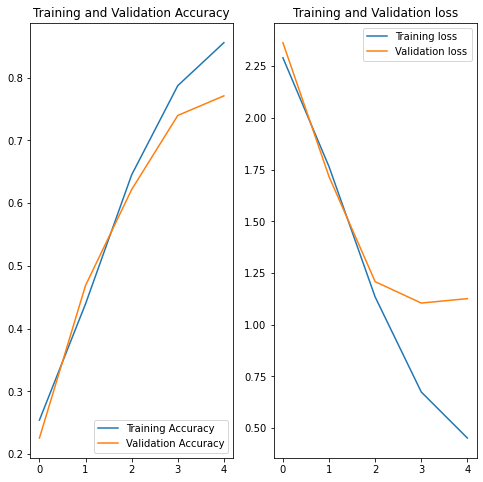

In [45]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


# plot loss  and val_loss accuracy

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')              # means jo apn indication box hai woh right upper mei aayga
plt.title("Training and Validation loss")
plt.show()

In [46]:
# Testing
score = model.evaluate(test_ds)


9/9 [==============================] - 12s 953ms/step - loss: 1.0819 - accuracy: 0.7951


In [47]:
score              # testing score

[1.0818842649459839, 0.7951388955116272]

In [48]:
# about history
history.params

{'verbose': 1, 'epochs': 5, 'steps': 265}

In [49]:
def pesticide(img_name):
    if img_name=='Field Cricket':
        print('You should use : Talstar PL granular for this pest')
    elif img_name=='Jute Stem Weevil':
        print('You should try : Spray 2.5kg of carbaryl 50 WP in 625 L of water per ha ')
    elif img_name=='Spilosoma Obliqua':
        print('You should use : cypermethrin for this pest')
    elif img_name=='Yellow Mite':
        print('You should use : Buprofezin 25% SC for this pest')
    elif img_name=='aphids ':
        print('You should use :  Insecticidal soaps and oils like petroleum based horticultural oil or plant based oils suchh as neem for this pest ')
    elif img_name=='armyworm ':
        print('You should use : Chlorantraniliprole, emamectin benzoate, and spinetoram for this pest')
    elif img_name=='beetle':
        print('You should use : Chlorpyrifos for this pest')
    elif img_name=='bollworm':
        print('You should use : Spray pyrethroids 100 days after sowing for this pest')
    elif img_name=='grasshopper':
        print('You should use : Malathion, carbaryl and permethrin for this pest')
    elif img_name=='mites':
        print('You should use : Azobenzene, dicofol, ovex, and tetradifon for this pest')
    elif img_name=='mosquito':
        print('You should use : organophosphate insecticides malathion and naled and the synthetic pyrethroid insecticides pralletrim for this pest')
    elif img_name=='sawfly ':
        print('You should use : Permethrin, bifenthrin, lambda cyhalothrin and carbaryl for this pest')
    elif img_name=='stem borer':
        print('You should use : furadan application for this pest')

First image to predict :
First image's actual label : beetle
1/1 [==============================] - 7s 7s/step
predicated labe is : beetle
You should use : Chlorpyrifos for this pest


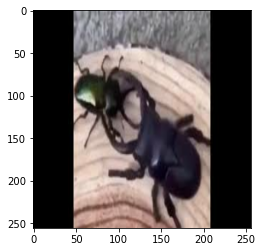

In [50]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    #plt.imshow(images_batch[0].numpy().astype('uint8'))  #this is our 1st image
    
    #print(images_batch[0].numpy().astype('uint8'))  # this will print 3-D RGB numbers
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict :")
    plt.imshow(first_image)
    print("First image's actual label :",class_names[first_label])
    # till here we load our image and label now we predict that image label
    
    batch_predication = model.predict(images_batch)   # image_batch predict for 32 images means batch by batch,, if we want 1st image predction then
    #print(batch_predication[0])   #it'll show 3d array coz,we use softmax here
    
    # print(np.argmax(batch_predication[0]))    #yha argmax lgake max probabilty le hai 
    
    print("predicated labe is :",class_names[np.argmax(batch_predication[0])])  # here class print krwa de us class ke
    pesticide(class_names[np.argmax(batch_predication[0])])

In [51]:
def pesticidee(img_name):
    if img_name=='Field Cricket':
        return('Talstar PL granular')
    elif img_name=='Jute Stem Weevil':
        return('Spray 2.5kg of carbaryl 50 WP in 625 L of water per ha ')
    elif img_name=='Spilosoma Obliqua':
        return('cypermethrin')
    elif img_name=='Yellow Mite':
        return('Buprofezin 25% SC')
    elif img_name=='aphids':
        return('Insecticidal soaps and oils')
    elif img_name=='armyworm ':
        return('Chlorantraniliprole, emamectin benzoate, and spinetoram')
    elif img_name=='beetle':
        return('Chlorpyrifos')
    elif img_name=='bollworm':
        return('Spray pyrethroids 100 days after sowing for this pest')
    elif img_name=='grasshopper':
        return('Malathion, carbaryl and permethrin')
    elif img_name=='mites':
        return('Azobenzene, dicofol, ovex, and tetradifon')
    elif img_name=='mosquito':
        return('organophosphate insecticides malathion')
    elif img_name=='sawfly':
        return('Permethrin, bifenthrin, lambda cyhalothrin and carbaryl')
    elif img_name=='stem borer':
        return('furadan applicatio')

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())   #convert image into array
    img_array = tf.expand_dims(img_array, 0)                  # creat a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    Pesticidee = pesticidee(predicted_class)
    return predicted_class, confidence, Pesticidee

1/1 [==============================] - 0s 62ms/step


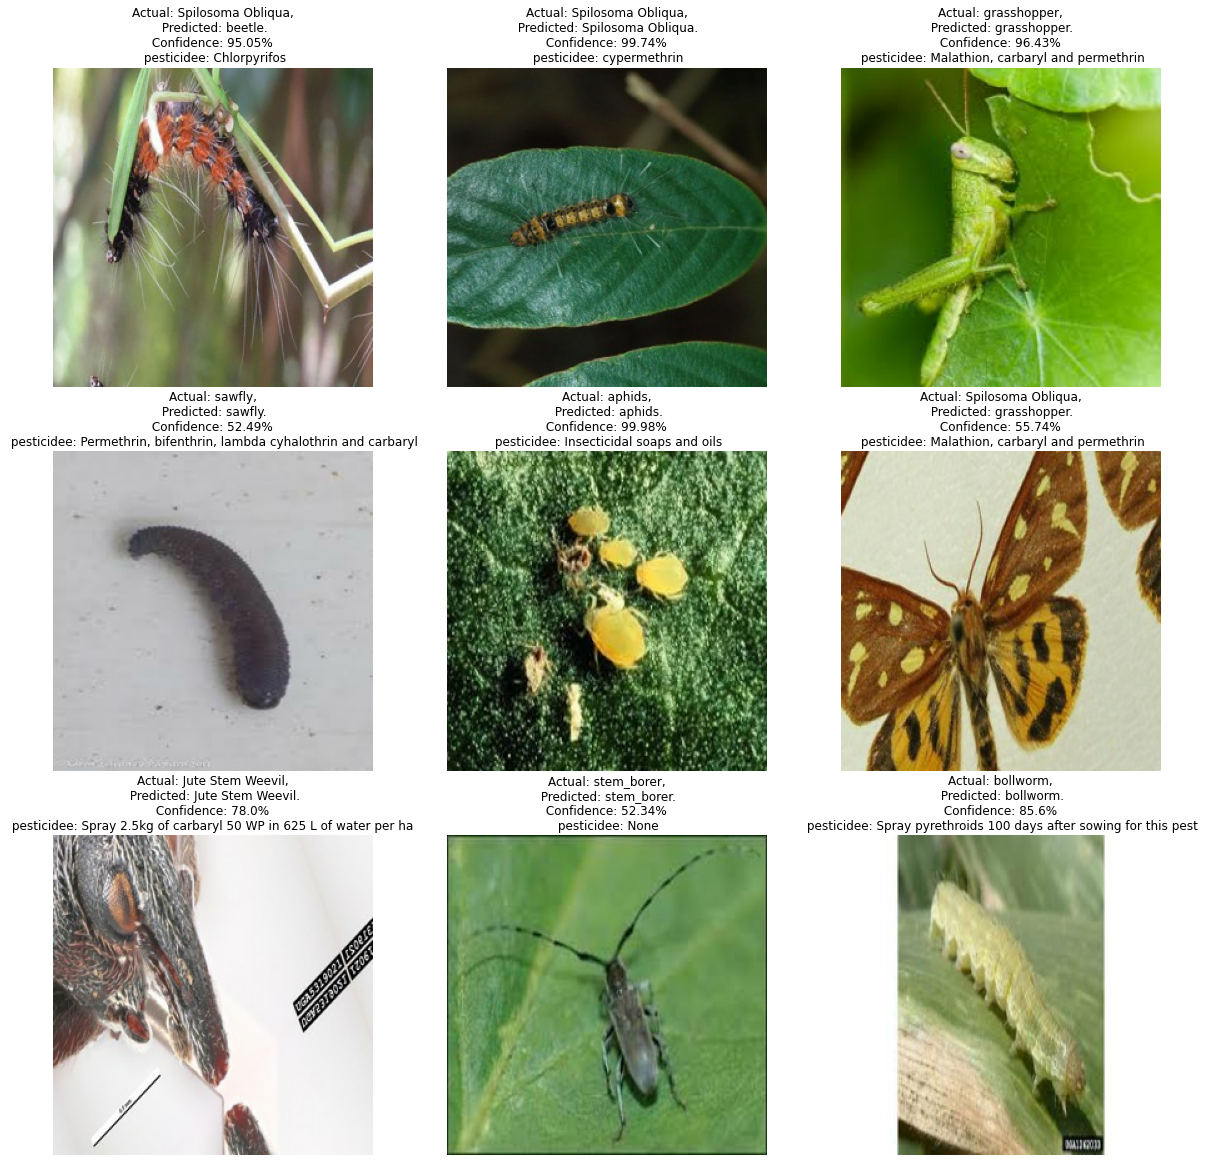

In [59]:
plt.figure(figsize=(20,20))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence,Pesticidee  = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}% \n pesticidee: {Pesticidee}")
        
        plt.axis("off")
        